# Exploratory Data Analysis - Diabetes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
db = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
db

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


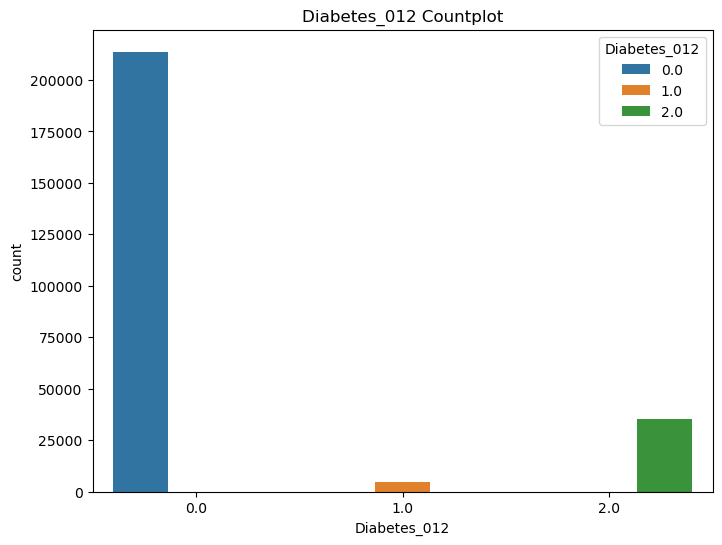

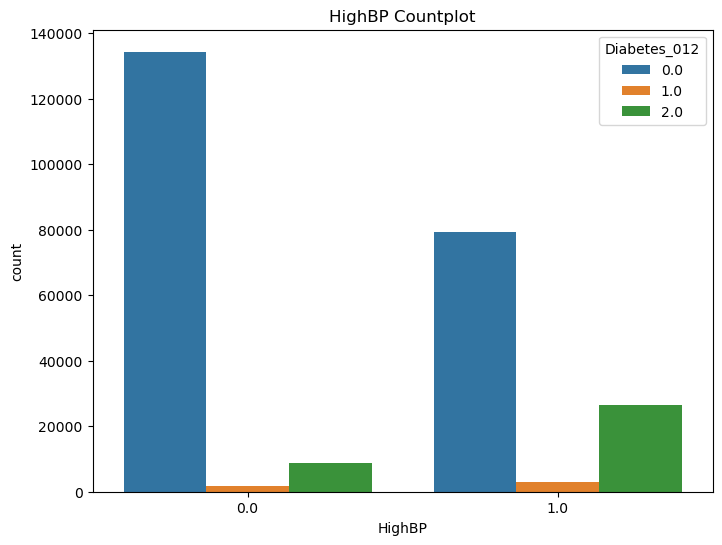

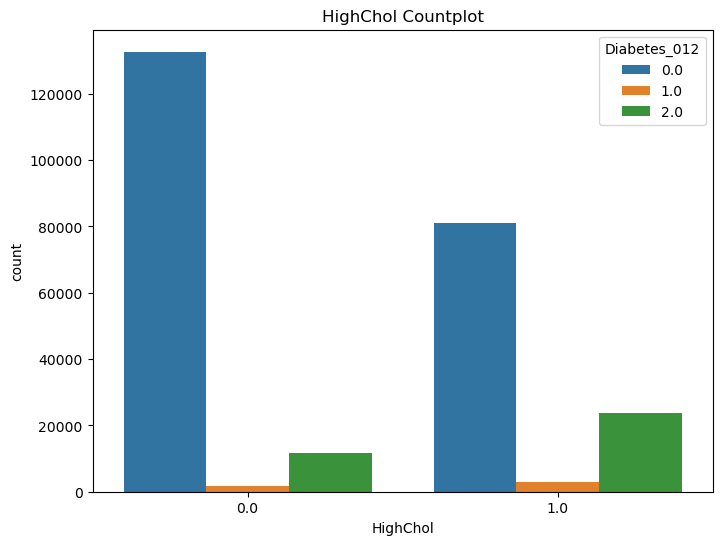

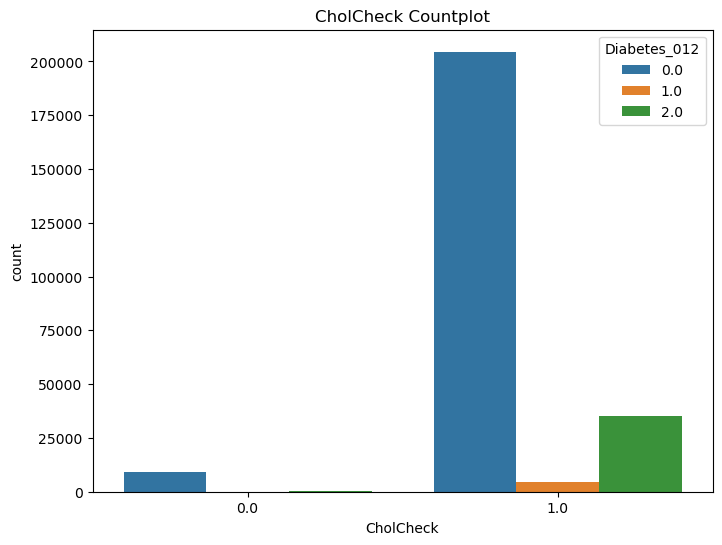

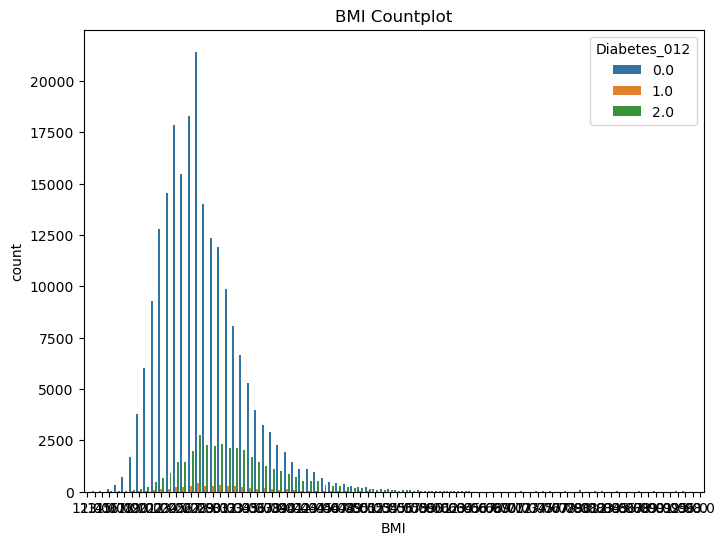

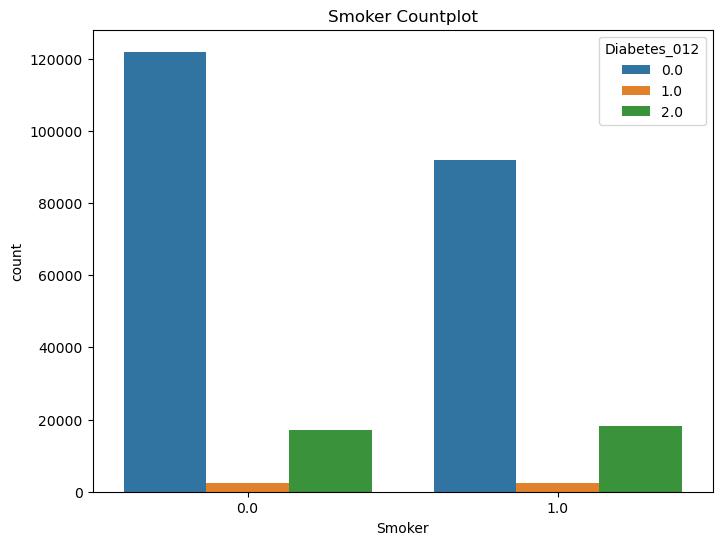

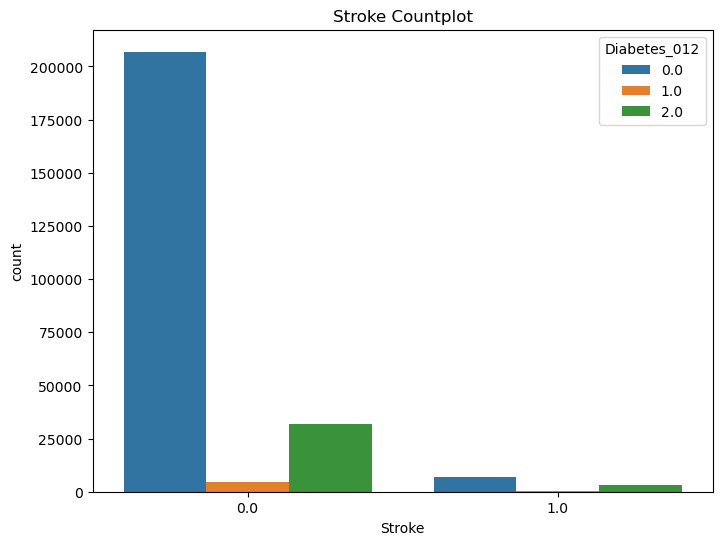

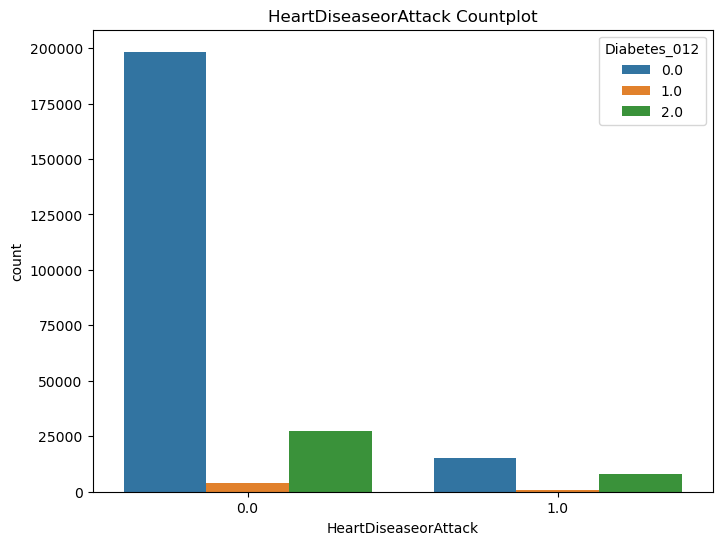

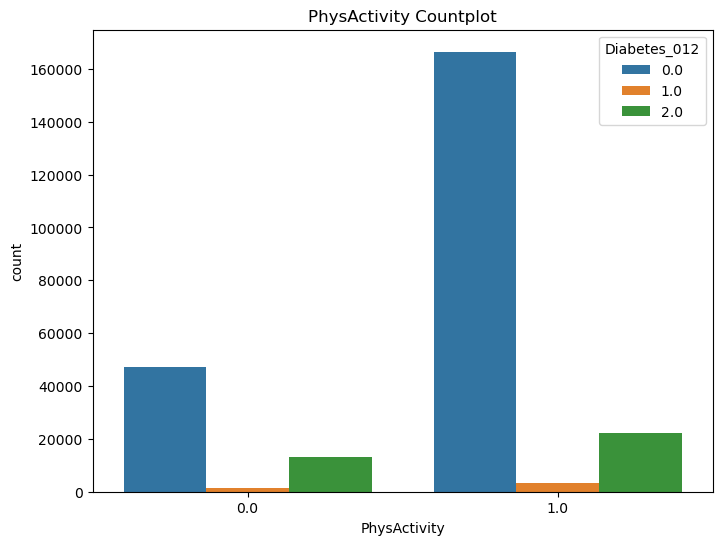

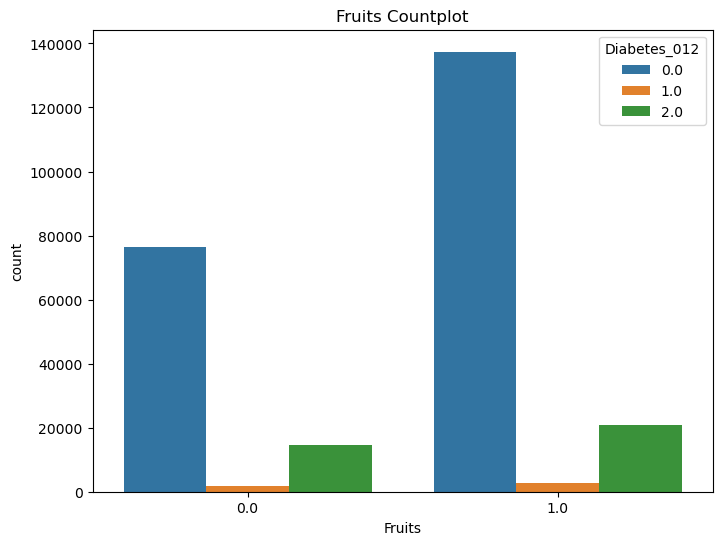

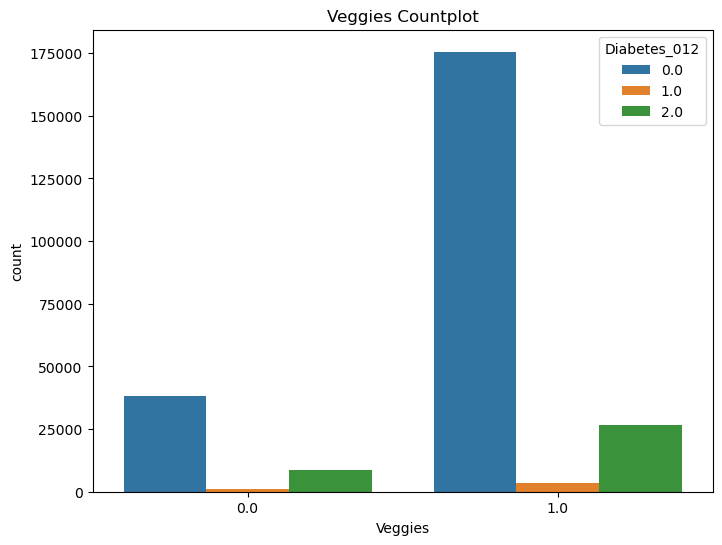

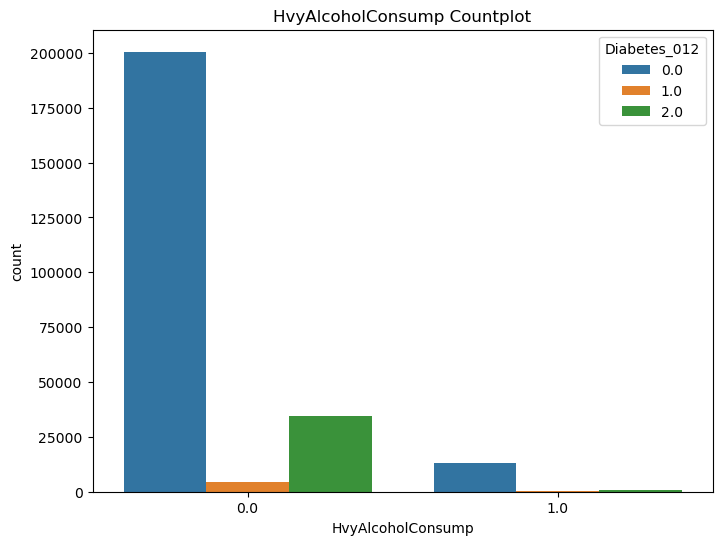

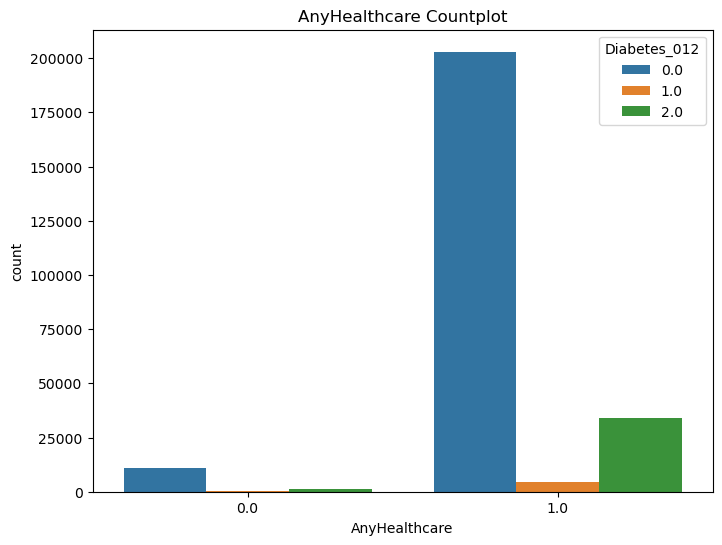

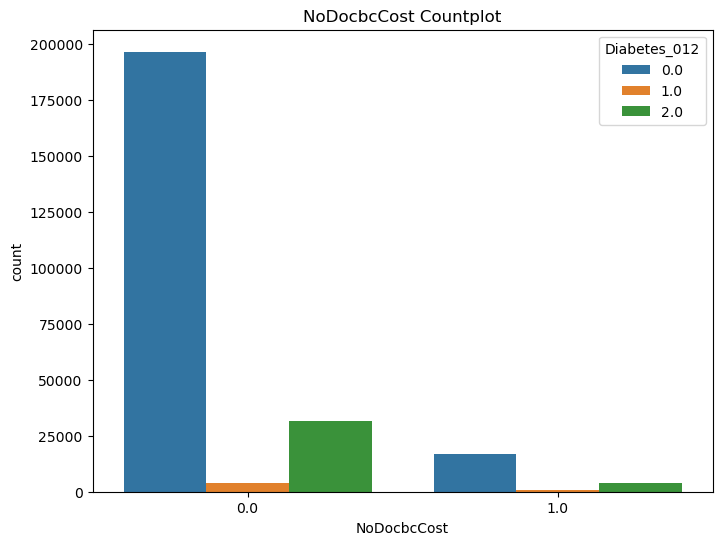

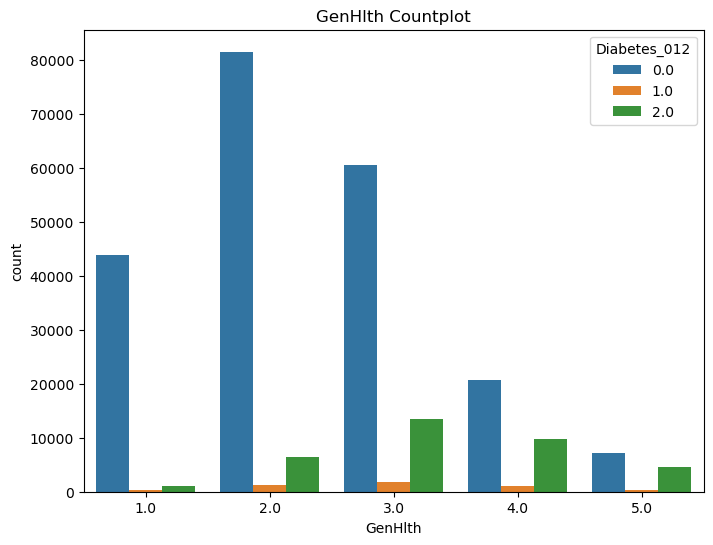

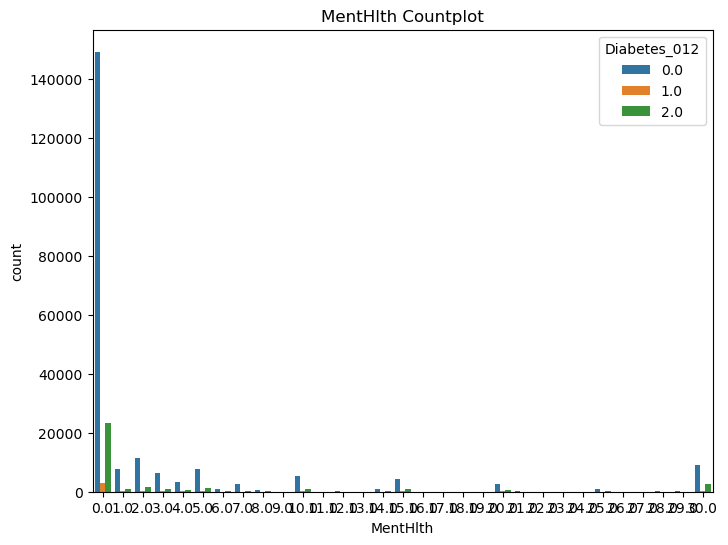

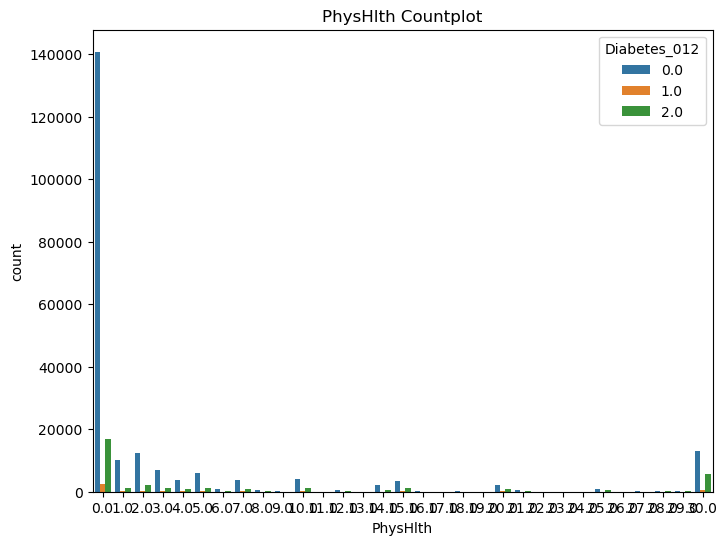

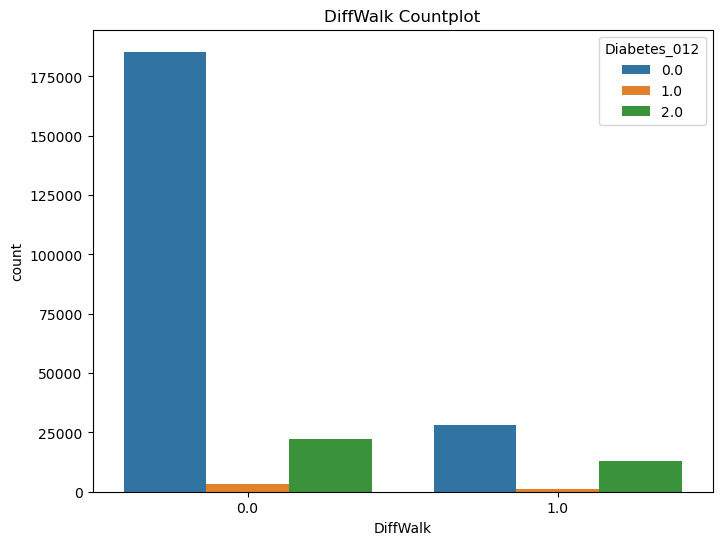

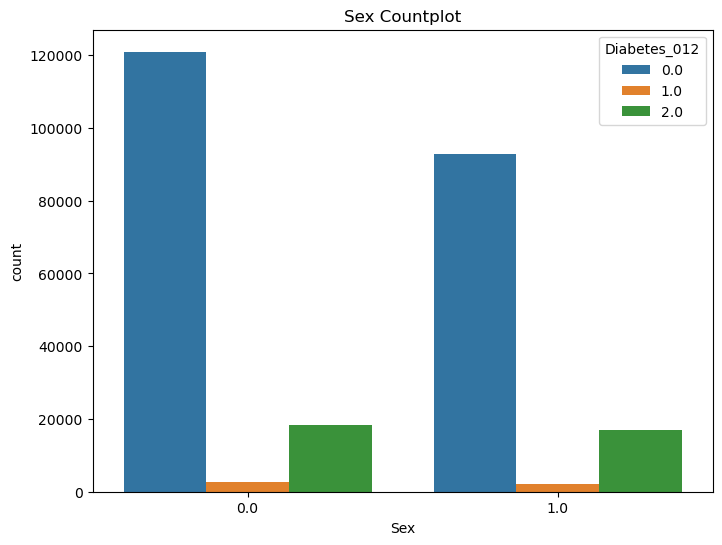

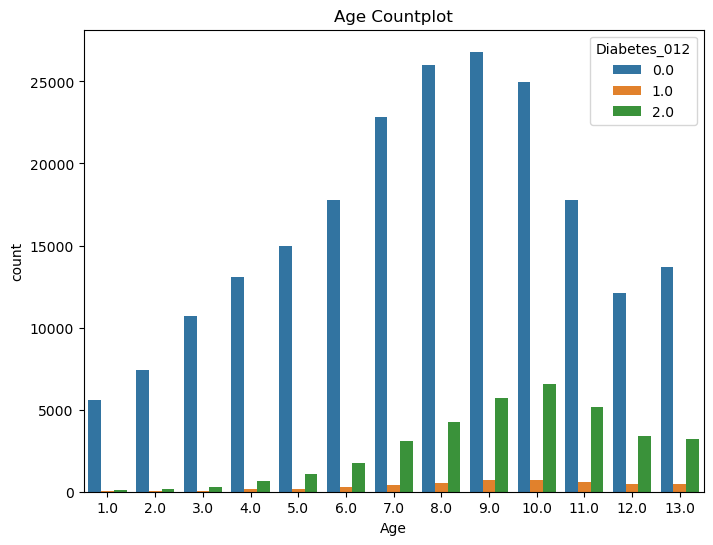

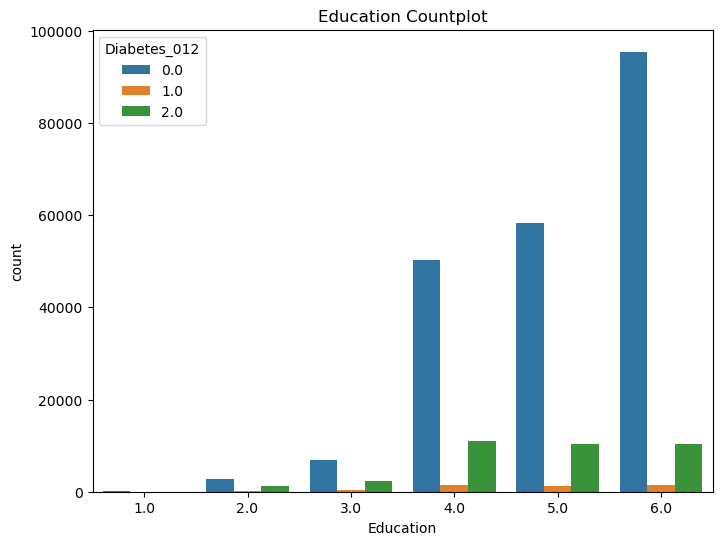

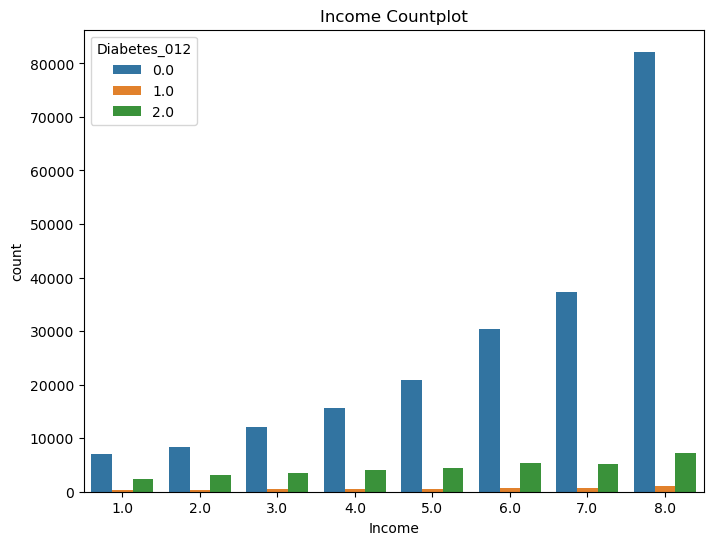

In [6]:
for column in db.columns:
    plt.figure(figsize = (8, 6))
    sns.countplot(x = column, hue = 'Diabetes_012', data = db)
    plt.title(f'{column} Countplot')
    plt.show()

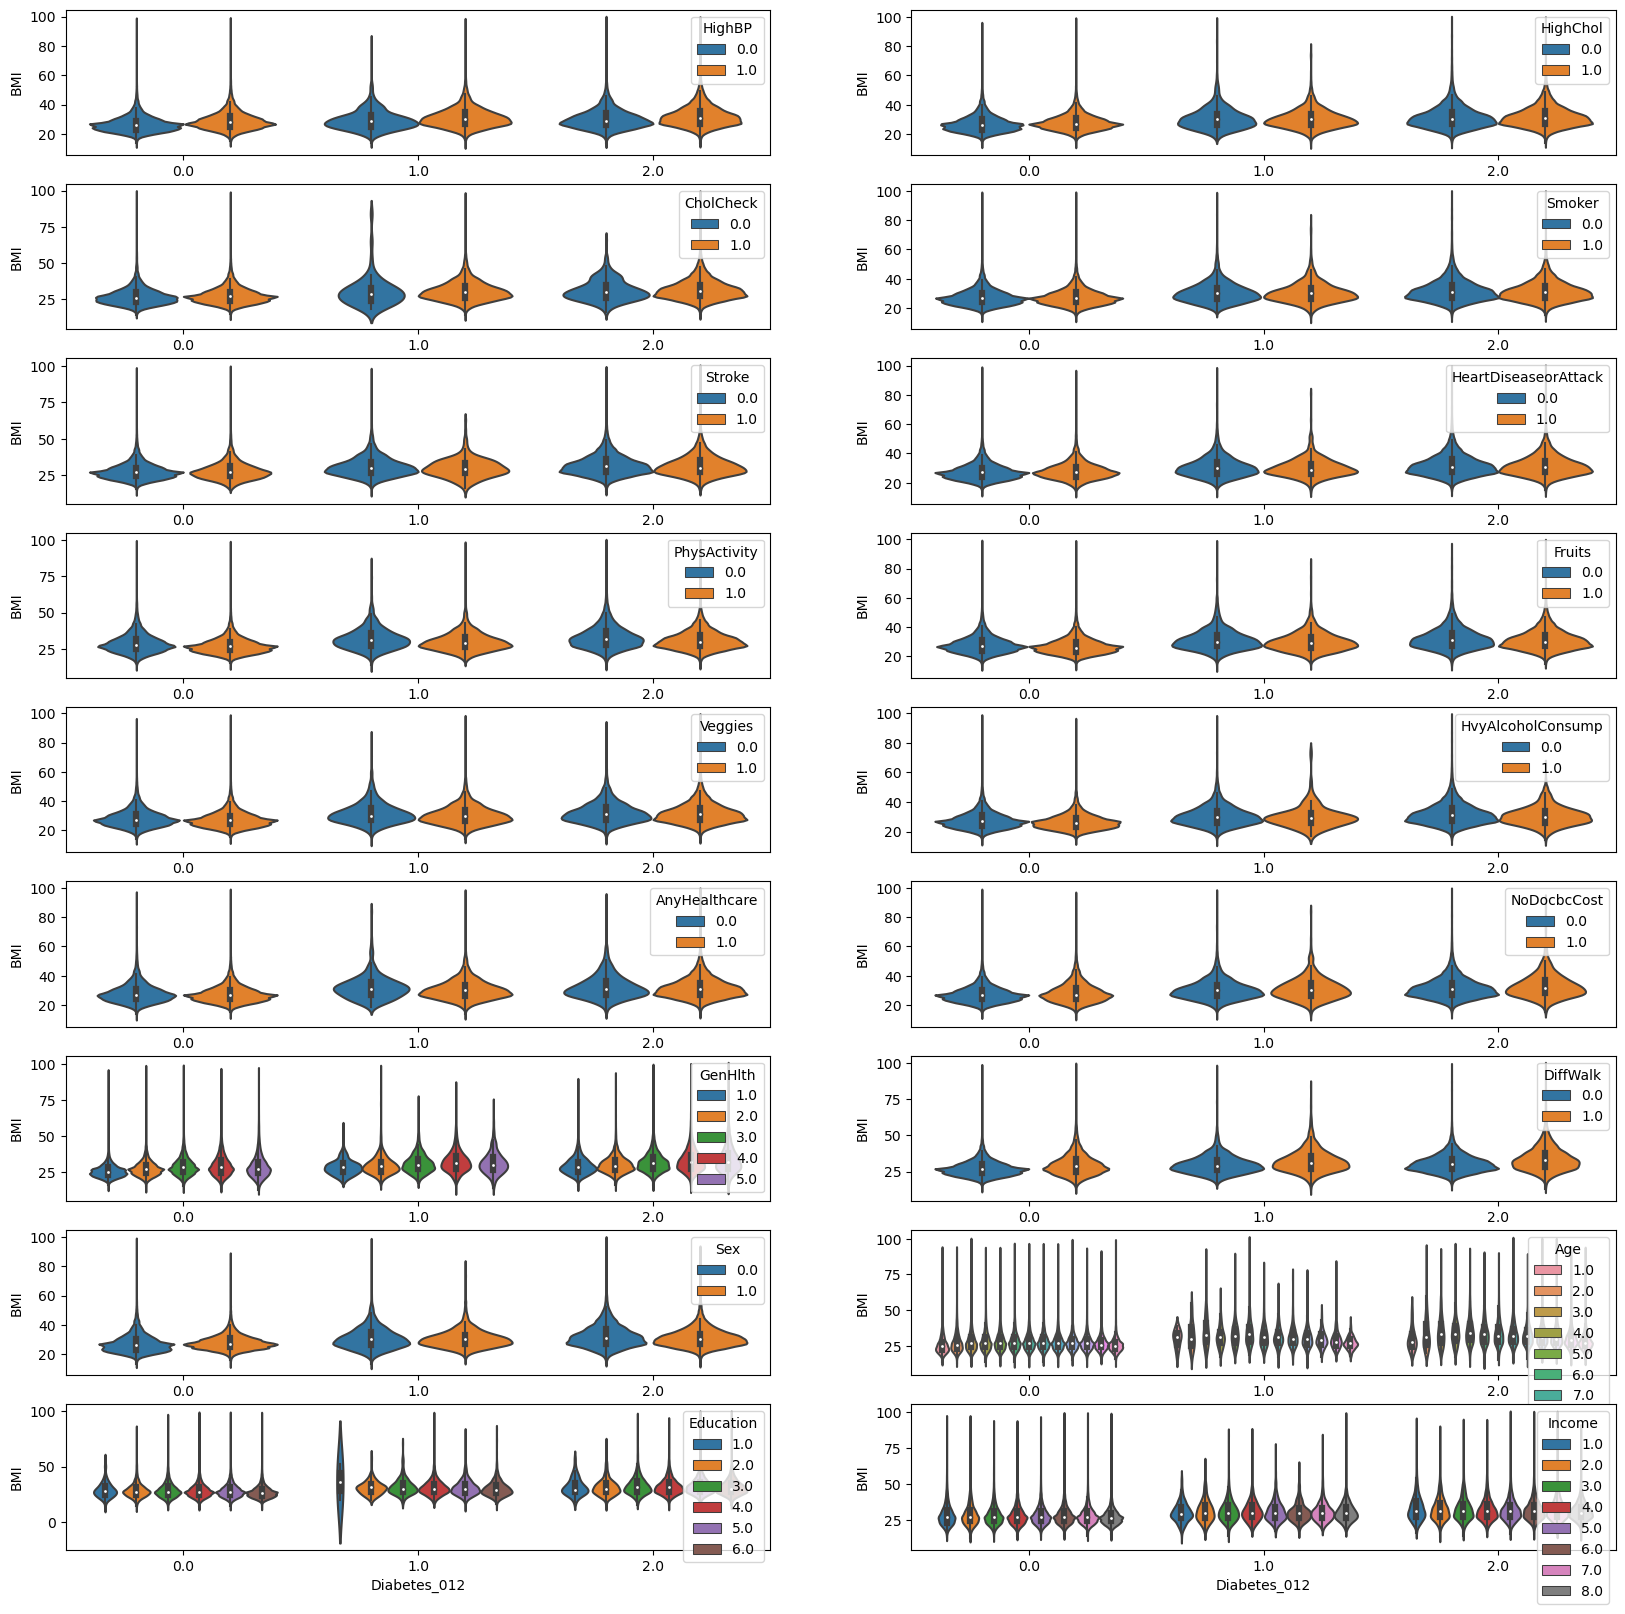

In [10]:
db_vio = db.drop(['MentHlth', 'PhysHlth', 'BMI', 'Diabetes_012'], axis=1)

plt.figure(figsize = (20, 20))
for i, col in enumerate(db_vio.columns):
    color_by = db_vio.columns[i]
    plt.subplot(9,2,i + 1)
    sns.violinplot(x = "Diabetes_012", y = "BMI", hue = color_by, data = db)

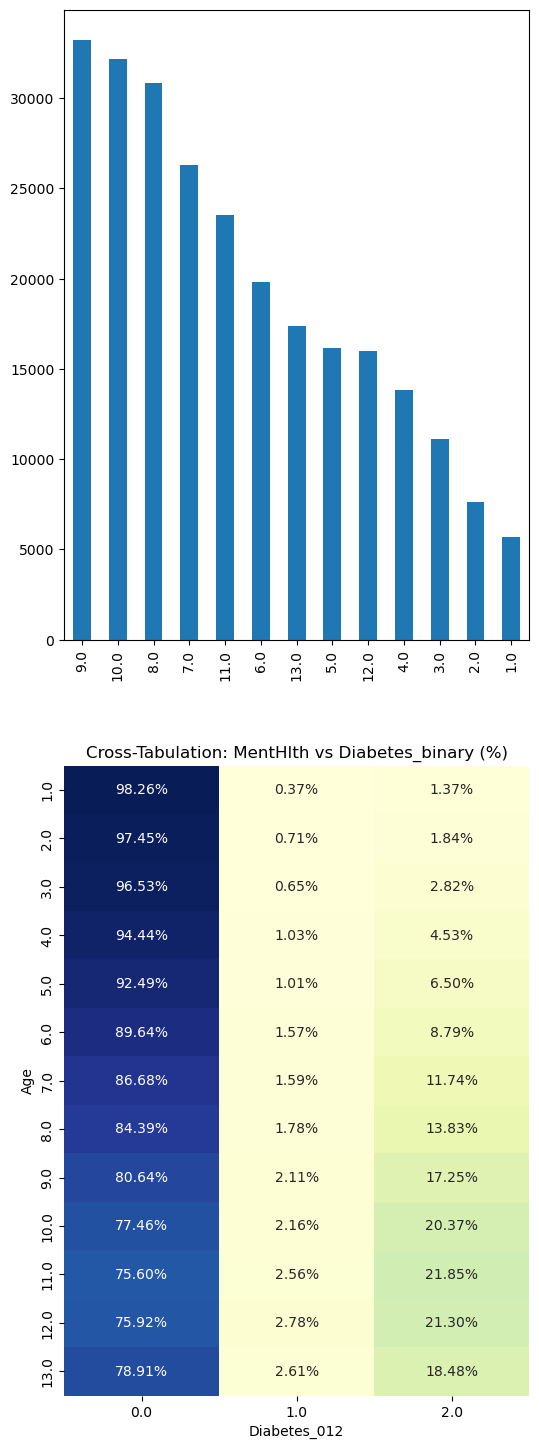

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(6, 18))

db['Age'].value_counts().plot(kind='bar', ax=axes[0])

contingency_table = pd.crosstab(db['Age'], db['Diabetes_012'], normalize = 'index')
sns.heatmap(contingency_table, annot = True, cmap = 'YlGnBu', fmt = '0.2%', cbar = False, ax = axes[1])
axes[1].set_title(f'Cross-Tabulation: MentHlth vs Diabetes_binary (%)')

plt.show()

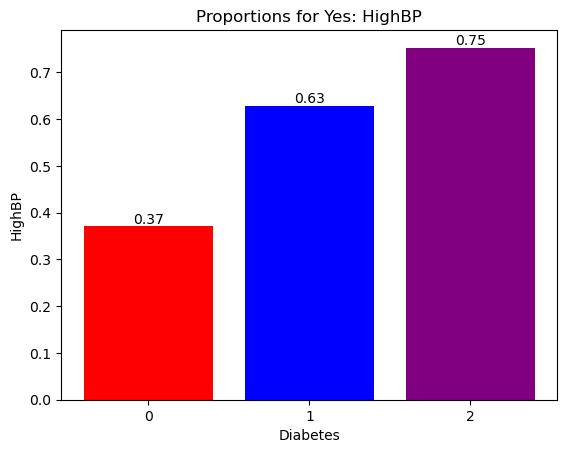

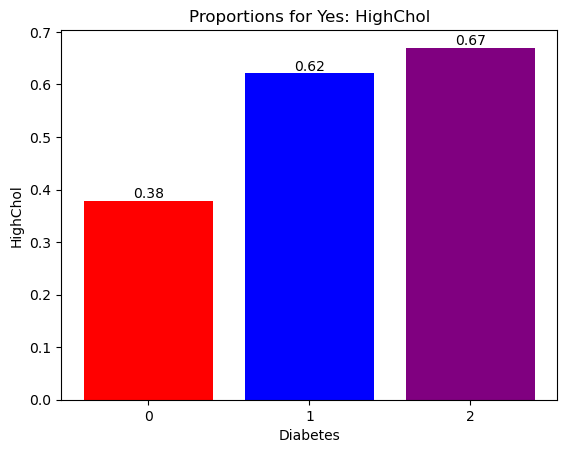

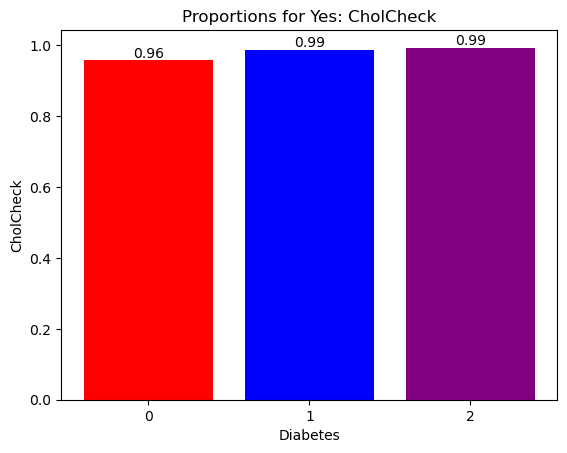

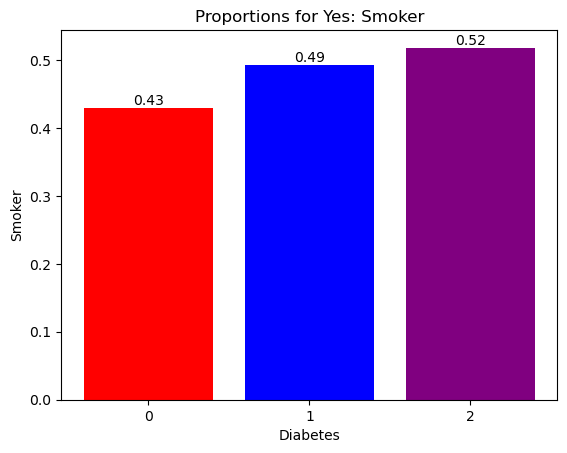

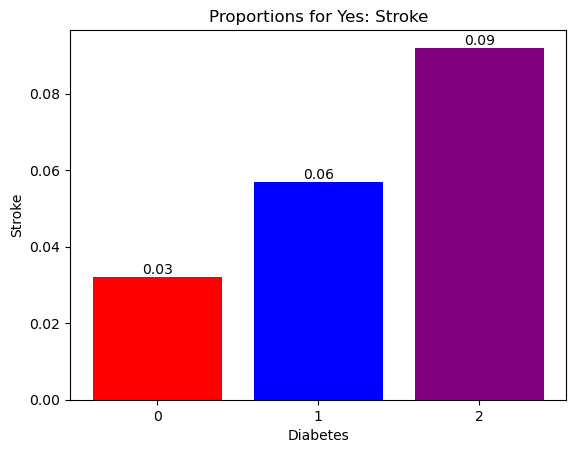

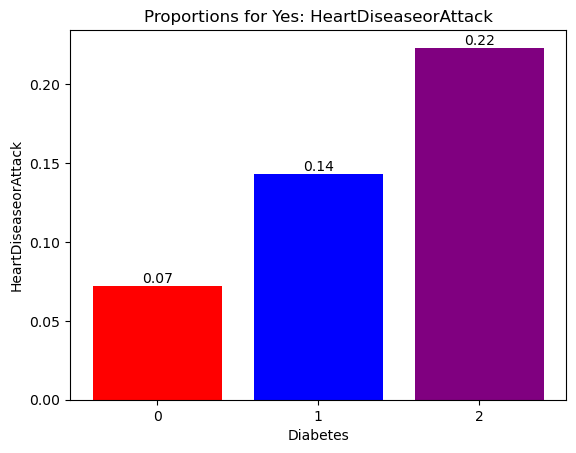

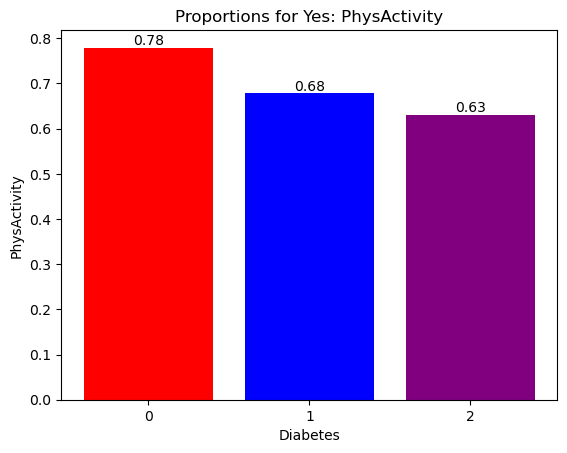

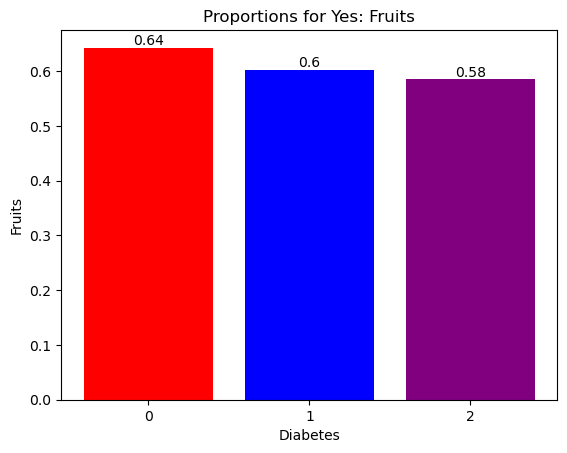

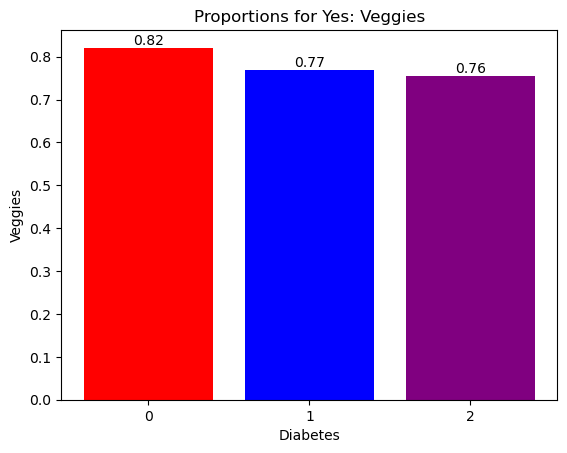

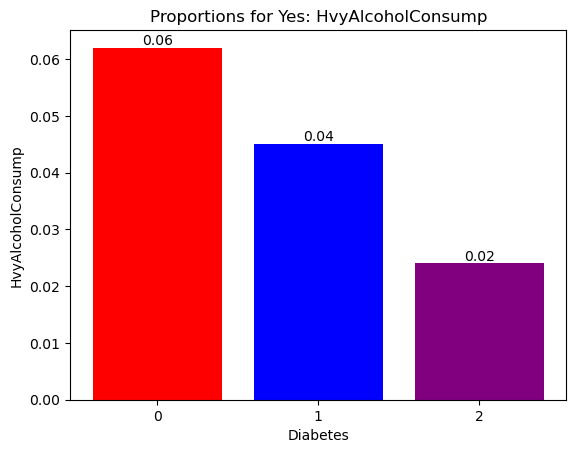

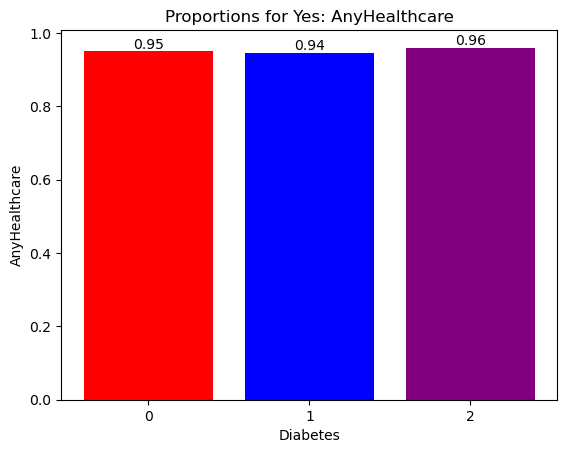

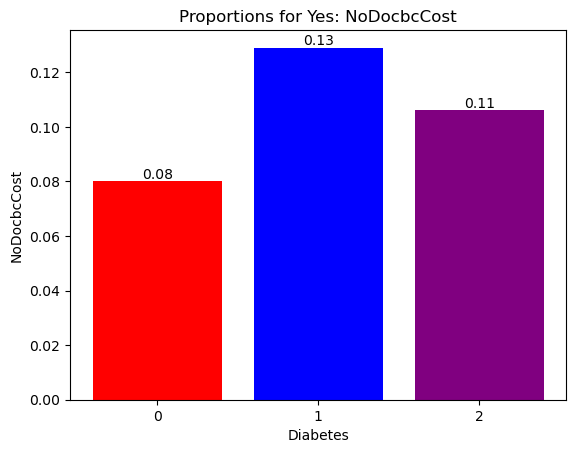

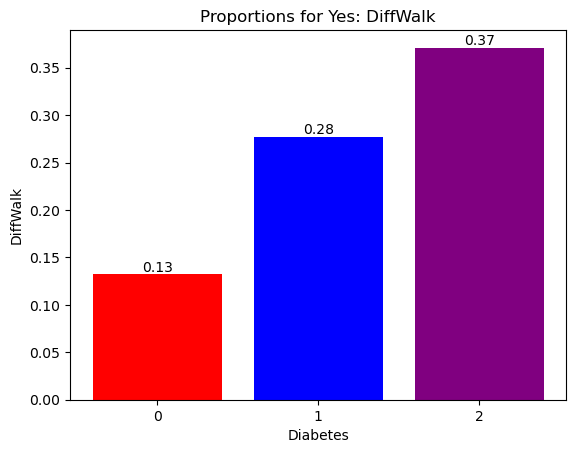

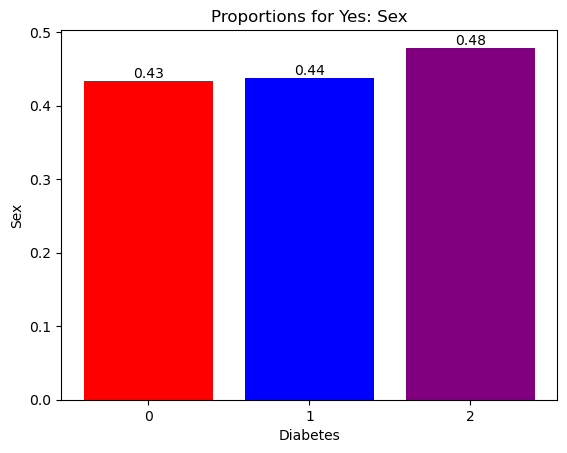

In [19]:
diabetes = 0
db0 = db[db["Diabetes_012"] == 0]

diabetes = 1
db1 = db[db["Diabetes_012"] == 1]

diabetes = 2
db2 = db[db["Diabetes_012"] == 2]


bincol = []
for column in db.columns:
    uv = db[column].unique()
    if len(uv) == 2: bincol.append(column)

p0 = []
for i in bincol:
    prop_ones0 = round(db0[i].mean(), 3)
    p0.append(prop_ones0)

p1 = []
for i in bincol:
    prop_ones1 = round(db1[i].mean(), 3)
    p1.append(prop_ones1)

p2 = []
for i in bincol:
    prop_ones2 = round(db2[i].mean(), 3)
    p2.append(prop_ones2)


for i in range(0, len(bincol)):
    props = [p0[i], p1[i], p2[i]]
    labs = ["0", "1", "2"]
    plt.bar(labs, props, color=["red", "blue", "purple"])
    for j, prop in enumerate(props):
        plt.text(j, prop, str(round(prop, 2)), ha='center', va='bottom')
    plt.title(f'Proportions for Yes: {bincol[i]}')
    plt.xlabel('Diabetes')
    plt.ylabel(bincol[i])
    plt.show()

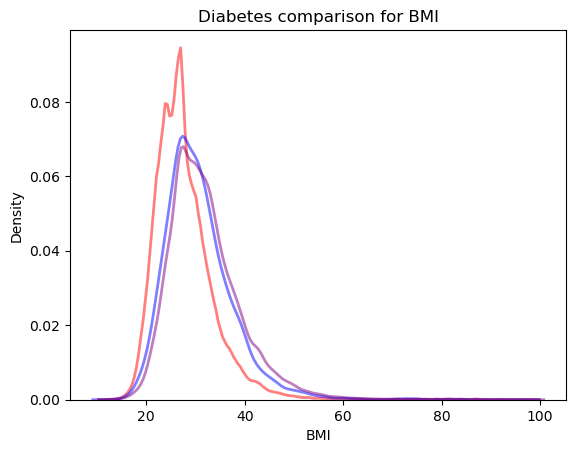

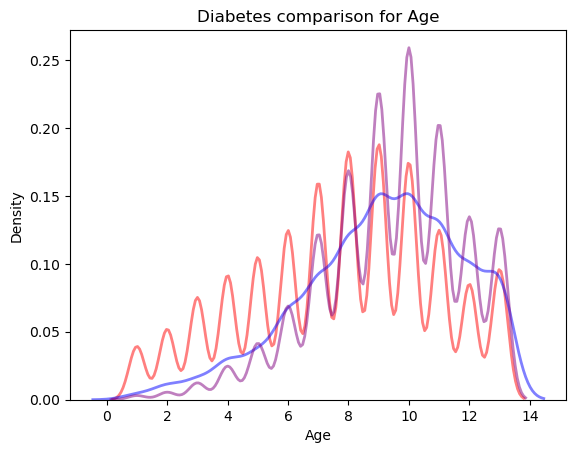

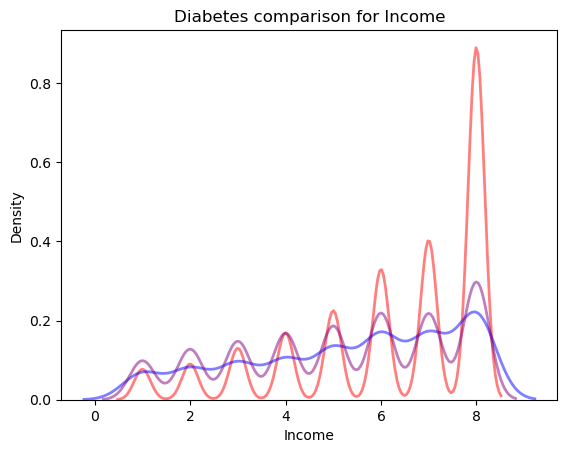

In [20]:
nonbincol = ['BMI', 'Age', 'Income']

for i in nonbincol:
    sns.kdeplot(db0[i], color = 'red', linewidth=2, alpha=0.5)
    sns.kdeplot(db1[i], color = 'blue', linewidth=2, alpha=0.5)
    sns.kdeplot(db2[i], color = 'purple', linewidth=2, alpha=0.5)

    plt.title(f'Diabetes comparison for {i}')
    plt.xlabel(i)
    plt.show()

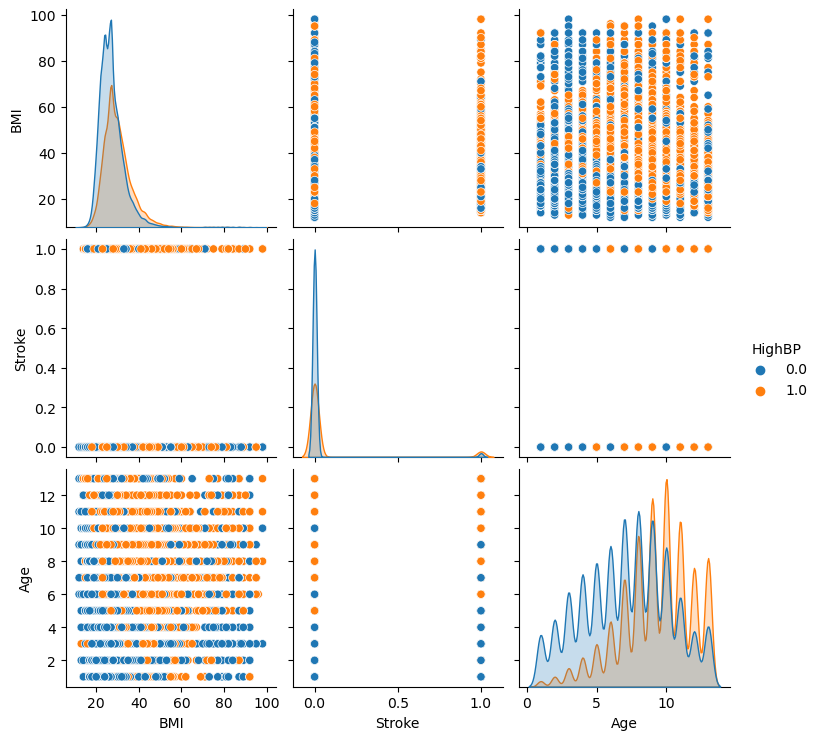

In [21]:
sub_diab = db[['BMI', 'Stroke', 'Age', 'HighBP']]
sns.pairplot(sub_diab, hue='HighBP')

#### Main Predictors:

Highbp, Highchol, BMI, Sex, Age

#### Potential Predictors (varies for different models):

physactivity, HvyAlcoholConsump, Stroke, heartdiseaseorattack, Smoker